In [352]:
import numpy as np
from scipy.integrate import *
from numpy.fft import *
import matplotlib.pyplot as plt

In [353]:
def diffeq(X,t):
  """
  A modell: R sugarú körön egyenletesen elrendezett golyók összekötve valamilyen rugóval.
  Bemenetnek kapja egy array-ben:
  - kezdeti szögeket
  - kezdeti szögsebességeket
  """

  N=int(len(X)/2)
  d=1 #"rugóállandó"
  m=1 #tömegek
  R=1 #"kör" sugara
  l=0.01 #rugók nyugalmi hossza

  phi=np.array(X[:N]) #első N darab elem a szögek
  omega=np.array(X[N:2*N])  #második N darab a szögsebességek

  beta=np.zeros(N)

  for n in range(N):
    if n==0:
      beta[n] = (1/(m*R)) * (-1) * d * ( R * np.sin(phi[n]-phi[N-1]) - R * np.sin(phi[n+1]-phi[n]) - l * np.cos((phi[n]+phi[N-1])/2) + l * np.cos((phi[n+1]+phi[n])/2))
    elif n==N-1:
      beta[n] = (1/(m*R)) * (-1) * d * ( R * np.sin(phi[n]-phi[n-1]) - R * np.sin(phi[0]-phi[n]) - l * np.cos((phi[n]+phi[n-1])/2) + l * np.cos((phi[0]+phi[n])/2))
    else:
      beta[n] = (1/(m*R)) * (-1) * d * ( R * np.sin(phi[n]-phi[n-1]) - R * np.sin(phi[n+1]-phi[n]) - l * np.cos((phi[n]+phi[n-1])/2) + l * np.cos((phi[n+1]+phi[n])/2))

  U=np.concatenate((omega,beta))

  return U


In [354]:
n=100 #golyók száma
s=500 #időfelosztás
T=500 #vizsgált időintervallum

In [355]:
t=np.linspace(0,T,s)

In [356]:
r=1
phi_0=r*np.linspace(0,2*np.pi,n)

omega_0=np.zeros(n)
omega_0[0]=1

X_0=np.concatenate((phi_0,omega_0))

In [357]:
u=odeint(diffeq,X_0,t)
#diffegy megoldása

In [358]:
phi=u[:,:n]
omega=u[:,n:2*n]
#A megoldás szétbontva

Text(0.5, 1.0, 'A szögsebességek alakulása')

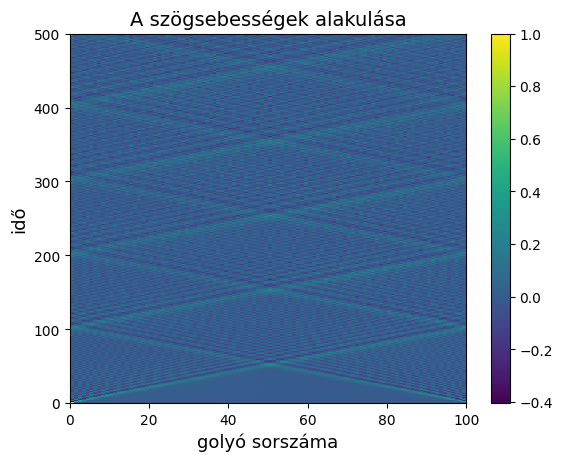

In [359]:
plt.pcolormesh(omega)
plt.colorbar()
plt.ylabel('idő', size=13)
plt.xlabel('golyó sorszáma', size=13)
plt.title('A szögsebességek alakulása', size=14)

In [360]:
v=r*omega

In [370]:
v_fft=np.abs(fft(ifft(v, axis=0),axis=1))
w=(fftfreq(len(t),t[1]-t[0]))
k=fftfreq(v.shape[1],1)

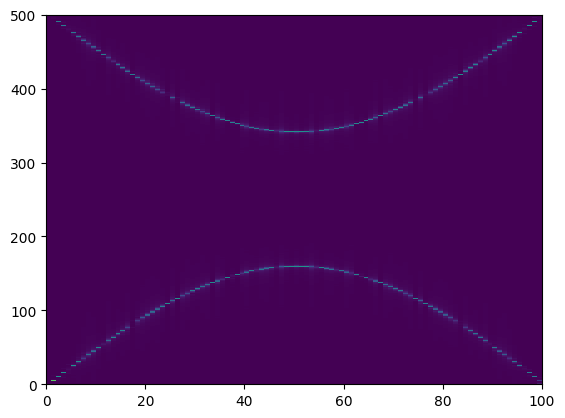

In [371]:
plt.pcolormesh(v_fft)

/tmp/ipython-input-3228930886.py:2: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  plt.pcolor(k,np.abs(w),v_fft, cmap='Purples')


Text(0.5, 1.0, '$\\omega (k)$')

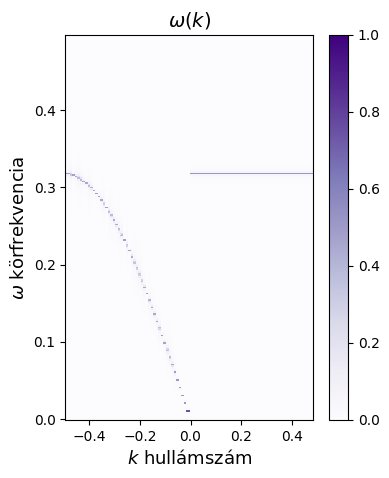

In [372]:
fig, axs = plt.subplots(figsize=(4, 5))
plt.pcolor(k,np.abs(w),v_fft, cmap='Purples')
plt.colorbar()
plt.ylabel(r'$\omega$ körfrekvencia', size=13)
plt.xlabel(r'$k$ hullámszám', size=13)
plt.title(r'$\omega (k)$', size=14)